# Monte Carlo Integration
### Using random numbers to approximate the integral of a function

This example illustrates how monte carlo methods can be utilized to estimate the integral:
$$ \int_{a}^{b} f(x) \,dx \$$

In [154]:
import numpy as np
import matplotlib.pyplot as plt

The first step is to make a class which contains functions for the integration and that store variables that will be used for plotting.

In [155]:
class MonteCarloIntegration:

    def __init__(self, func):

        self.func = func

        self.box_x = None
        self.box_y = None
        
        self.inside_points = None
        self.outside_points = None

        return None
    
    def evaluate(self, x):
        return self.func(x)
    
    def integrate(self, x_min, x_max, n_points):

        # make 100 points between min and max and evaluate to find a maximum and add 20%
        y_max = self.evaluate(np.linspace(x_min, x_max, 100)).max() * 1.2
        y_min = 0

        # Store box variables
        self.box_x = (x_min, x_max)
        self.box_y = (y_min, y_max)

        # Establish a box with known area
        area = (x_max - x_min) * (y_max - y_min)

        # Generate random points
        x_coords = np.random.uniform(x_min, x_max, n_points)
        y_coords = np.random.uniform(0, y_max, n_points)

        # Evaluate function x coordinates
        eval = self.func(x_coords)

        # Check if y coordinates are below curve
        n_points_outside = (y_coords > eval).sum()

        # Estimate the area under the curve
        est_area = ((n_points - n_points_outside) / n_points) * area

        print(f'Estimate of integral: {est_area}')

        self.inside_points = np.array([x_coords[y_coords <= eval], y_coords[y_coords <= eval]])
        self.outside_points = np.array([x_coords[y_coords > eval], y_coords[y_coords > eval]])



The second step in this example is to define an example function. In this case we choose the function:

$$ f(x) = \sin{x} + \sqrt{x} $$


In [156]:
def f(x):
    #return np.sin(x) * x + 5
    return np.sin(x) + np.sqrt(x)
    
xs = np.linspace(0, 8, 101)


We'll now estimate the integral using monte carlo integration:

$$ \int_{2}^{6} (\sin{x} + \sqrt{x}) \,dx \$$



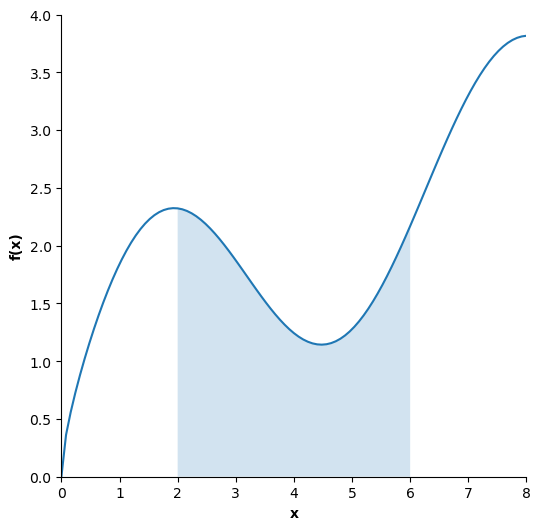

In [157]:
x = np.array([2, 6])

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(xs, f(xs))
ax.set_xlim(0, 8)
ax.set_ylim(0, 4)
ax.spines[['right', 'top']].set_visible(False)

ax.set_xlabel('x', weight='bold')
ax.set_ylabel('f(x)', weight='bold')

#ax.vlines(x, [0, 0], f(x), color='black')
ax.fill_between(np.linspace(x[0], x[1], 101), f(np.linspace(x[0], x[1], 101)), alpha=0.2)

plt.show()

The steps for doing this is:
1. Evaluate the function at even points in the range of interest to estimate a the maximum value of f(x) in that range, and add 20% for a safety margin.
2. Create a rectangle with width corresponding to the range of interest and height between zero and the maxximum value of f(x) * 1.2
3. Create random points within this rectangle
4. For each point: check if its y coordinate is > than f(x coordinate), if so the point falls above the the curve
5. Divide the number of points under the curve with the total number of pointd and multiply with the area of the rectangle to get the estimate of the area under the curve.

In [166]:
# Create an instance of the Monte Carlo Class
monte_carlo = MonteCarloIntegration(f)

# Integrate f inte range 2 to 6 using 5000 random points
monte_carlo.integrate(2, 6, 5000)

Estimate of integral: 6.56456912756352


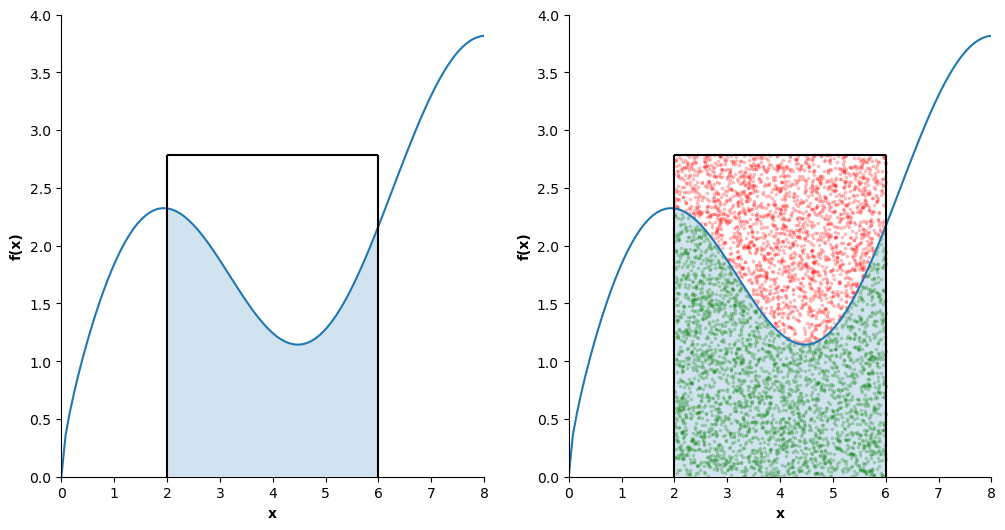

In [159]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].plot(xs, f(xs))
axs[0].set_xlim(0, 8)
axs[0].set_ylim(0, 4)
axs[0].spines[['right', 'top']].set_visible(False)

axs[0].set_xlabel('x', weight='bold')
axs[0].set_ylabel('f(x)', weight='bold')

axs[0].vlines(monte_carlo.box_x, [0, 0], monte_carlo.box_y[1], color='black')
axs[0].hlines(monte_carlo.box_y[1], monte_carlo.box_x[0], monte_carlo.box_x[1], color='black')

axs[0].fill_between(np.linspace(x[0], x[1], 101), f(np.linspace(x[0], x[1], 101)), alpha=0.2)

axs[1].plot(xs, f(xs))
axs[1].set_xlim(0, 8)
axs[1].set_ylim(0, 4)
axs[1].spines[['right', 'top']].set_visible(False)

axs[1].set_xlabel('x', weight='bold')
axs[1].set_ylabel('f(x)', weight='bold')

axs[1].vlines(monte_carlo.box_x, [0, 0], monte_carlo.box_y[1], color='black')
axs[1].hlines(monte_carlo.box_y[1], monte_carlo.box_x[0], monte_carlo.box_x[1], color='black')

axs[1].fill_between(np.linspace(x[0], x[1], 101), f(np.linspace(x[0], x[1], 101)), alpha=0.2)

axs[1].scatter(monte_carlo.inside_points[0], monte_carlo.inside_points[1], c='g', s=3, alpha=0.2)
axs[1].scatter(monte_carlo.outside_points[0], monte_carlo.outside_points[1], c='r', s=3, alpha=0.2)

plt.show()